In [1]:
#load the macro
%store -r __common_lib

In [2]:
__common_lib

The libraries have been loaded!


In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## 1. Basic data exploration

### 1.1 general stats

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 1.2 Remove Outliers

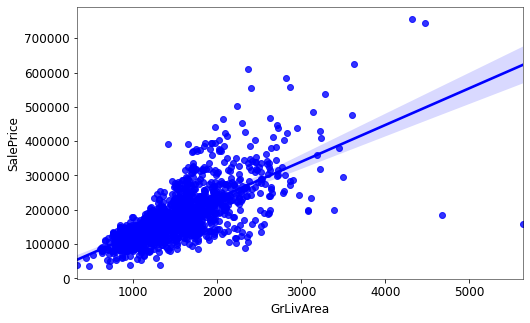

In [6]:
sns.regplot(data=train, x='GrLivArea', y='SalePrice')
plt.show()

In [7]:
# remove two outliers that were sold too cheap for their sizes
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

### 1.3 Transform label to get better statistic attributes

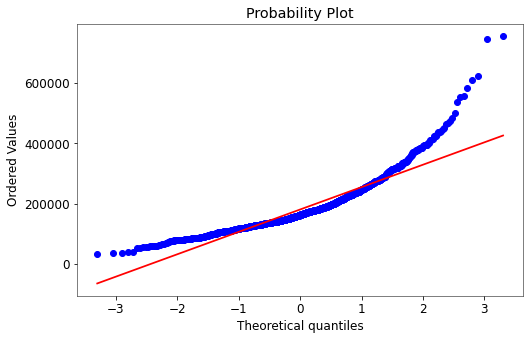

In [8]:
# QQ plot
from scipy import stats
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

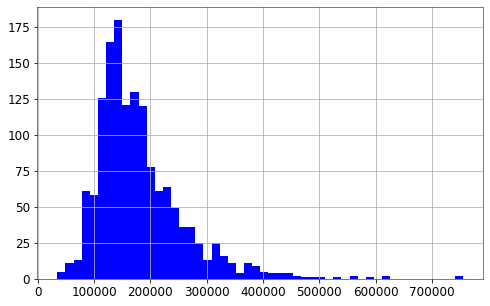

In [9]:
train['SalePrice'].hist(bins=50)
plt.show()

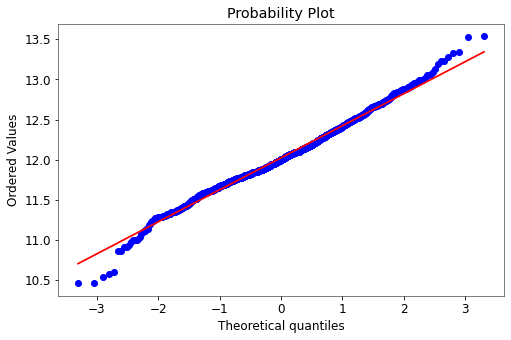

In [10]:
train['SalePrice'] = np.log1p(train['SalePrice'])
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

<AxesSubplot:>

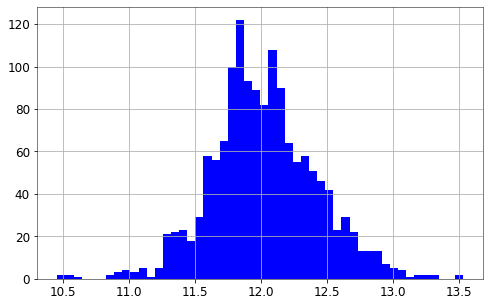

In [11]:
train['SalePrice'].hist(bins=50)

# 2. Preprocessing

## 2.1 Fill NA and transform

In [12]:
def Count_NA(feat_ls):
    """
    show the NA features
    """
    train_df = train[feat_ls].isna().sum()[train[feat_ls].isna().sum()>0]
    train_df.rename('Train',inplace=True)
    test_df = test[feat_ls].isna().sum()[test[feat_ls].isna().sum()>0]
    test_df.rename('Test',inplace=True)
    NA_df = pd.concat([train_df, test_df],axis=1)
    NA_df.fillna(0, inplace=True)
    return NA_df

##### a. Numerical features

In [13]:
num = ['LotFrontage','LotArea','MasVnrArea',
        'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
        'OverallQual','OverallCond',
        'YearBuilt','YearRemodAdd','MoSold','YrSold','GarageYrBlt',
        '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
        'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
        'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces',
        'GarageCars','GarageArea',
        'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']

In [14]:
num_NA = Count_NA(num)
num_NA

,Train,Test
LotFrontage,259.0,227
MasVnrArea,8.0,15
GarageYrBlt,81.0,78
BsmtFinSF1,0.0,1
BsmtFinSF2,0.0,1
BsmtUnfSF,0.0,1
TotalBsmtSF,0.0,1
BsmtFullBath,0.0,2
BsmtHalfBath,0.0,2
GarageCars,0.0,1


Note 1 
- fill LotFrontage with 0
- fill MasVnrArea with 0 because NA means no Mas
- fill GarageYrBlt with min of train set
- treat year and month features with caution

In [15]:
# fill nan
num_fill0 = num_NA.index.tolist()
num_fill0.remove('GarageYrBlt')

train[num_fill0] = train[num_fill0].fillna(0)
test[num_fill0] = test[num_fill0].fillna(0)

GarageYr_Min = train['GarageYrBlt'].min()
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(GarageYr_Min)
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(GarageYr_Min)

# check nan again
Count_NA(num)

,Train,Test


##### b. String Ordinal

In [16]:
ord_ex = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC',
          'KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC',]
ord_GLQ = ['BsmtFinType1','BsmtFinType2']
ord_oth = ['BsmtExposure','Electrical','Functional','GarageType','GarageFinish','PavedDrive','Fence']
ords = ord_ex + ord_GLQ + ord_oth

In [17]:
# count number of nan
Count_NA(ords)

,Train,Test
BsmtQual,37.0,44.0
BsmtCond,37.0,45.0
FireplaceQu,690.0,730.0
GarageQual,81.0,78.0
GarageCond,81.0,78.0
PoolQC,1452.0,1456.0
BsmtFinType1,37.0,42.0
BsmtFinType2,38.0,42.0
BsmtExposure,38.0,44.0
Electrical,1.0,0.0


In [18]:
# create ordinal mapping
ord_ex_map = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}
ord_GLQ_map = {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0}
BE_map = {'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'NA':0}
El_map = {'SBrkr':5, 'FuseA':4, 'FuseF':3, 'FuseP':2, 'Mix':1, 'NA':5} # Standard unless specified
Fn_map = {'Typ':8, 'Min1':7, 'Min2':6, 'Mod':5, 'Maj1':4, 'Maj2':3, 'Sev':2, 'Sal':1, 'NA':8} # Typical unless specified
GT_map = {'2Types':6, 'Attchd':5, 'Basment':4, 'BuiltIn':3, 'CarPort':2, 'Detchd':1, 'NA':0}
GF_map = {'Fin':3,'RFn':2,'Unf':1,'NA':0}
PD_map = {'Y':3, 'P':2, 'N':1, 'NA':0}
Fc_map = {'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'NA':0}
oth_MAP_ls = [BE_map, El_map, Fn_map, GT_map, GF_map, PD_map, Fc_map]

In [19]:
# replace na with string NA
train[ords] = train[ords].fillna('NA')
test[ords] = test[ords].fillna('NA')
# encode ordinal features
train[ord_ex] = train[ord_ex].replace(ord_ex_map)
train[ord_GLQ] = train[ord_GLQ].replace(ord_GLQ_map)
test[ord_ex] = test[ord_ex].replace(ord_ex_map)
test[ord_GLQ] = test[ord_GLQ].replace(ord_GLQ_map)

for feat, MAP in zip(ord_oth, oth_MAP_ls):
    train[feat] = train[feat].replace(MAP)
    test[feat] = test[feat].replace(MAP)
    
Count_NA(ords)

,Train,Test


##### c. Categorical

In [20]:
cat = ['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
      'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
      'MasVnrType','Foundation','Heating','CentralAir','MiscFeature','SaleType','SaleCondition']

In [21]:
cat_NA = Count_NA(cat)
cat_NA

,Train,Test
Alley,1367.0,1352
MasVnrType,8.0,16
MiscFeature,1404.0,1408
MSZoning,0.0,4
Utilities,0.0,2
Exterior1st,0.0,1
Exterior2nd,0.0,1
SaleType,0.0,1


- Drop Alley and MiscFeatures for too many missing
- Drop Utility for almost all have the same value

In [22]:
cat_drop = ['Alley','MiscFeature','Utilities']
train.drop(cat_drop, axis=1, inplace=True)
test.drop(cat_drop, axis=1, inplace=True)
for feature in cat_drop:
    cat.remove(feature)

In [23]:
train[cat] = train[cat].fillna('None')
test['SaleType'] = test['SaleType'].fillna(train['SaleType'].mode()[0]) # has to have a sale type
test[cat] = test[cat].fillna('None')

Count_NA(cat)

,Train,Test


## 2.2 Feature Preprocessing

#### 2.2.1. Without Pipeline

##### a). Create Exterial, Basement, Garage, Bathroom, Age and Season when sold

In [24]:
def group_num_features(dataset, drop_crit = False, drop_non_crit = False):
    df = dataset.drop("Id",axis=1)
    epsilon = 0.01
    
    # Sold Age, Last Refreshed, Sold Season,
    df['Age'] = df['YrSold'] - df['YearBuilt']
    df['YrRefreshed'] = df[['YearBuilt','YearRemodAdd']].max(1)
    df['Warm'] = df['MoSold'].isin([5,6,7,8,9,10])*1
    
    # Basement Score
    Bsmt = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']
    df['BsmtScore'] =  (df['BsmtFinSF1'] * (df['BsmtFinType1']/10 + 1) \
                                     + df['BsmtFinSF2'] * (df['BsmtFinType2']/10 + 1) \
                                     + df['BsmtUnfSF'] * 0.5) \
                                   * (df['BsmtQual']/10 + 1) \
                                   * (df['BsmtCond']/10 + 1) \
                                   * (df['BsmtExposure']/10 + 1)    


    # Garage Score
    Garage = ['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']
    Sqf_per_Car = df['GarageArea'].sum() / df['GarageCars'].sum()
    df['GarageScore'] = df['GarageArea'] \
                                   * df['GarageArea'] / (df['GarageCars'] + epsilon) / Sqf_per_Car \
                                   * (df['GarageFinish']/10 + 1) \
                                   * (df['GarageQual']/10 + 1) \
                                   * (df['GarageCond']/10 + 1) \
                                   / ((df['YrSold'] - df['GarageYrBlt'])//10/100 + 1) # Age Penalty      

    # bathrooms:
    df['Bath'] = df['FullBath'] + df['HalfBath']*0.5
    df['BsmtBath'] = df['BsmtFullBath'] + df['BsmtHalfBath']*0.5
    df['TtlBath'] = df['Bath'] + df['BsmtBath']
    
    # Porch:
    df['PorchAdj'] = df['OpenPorchSF']*0.5 + df['ScreenPorch']*0.75 + df['3SsnPorch'] + df['EnclosedPorch']*1.25
    
    # Total Area
    df['TotalSF'] = df['TotalBsmtSF'] + df['GrLivArea']
    
    if drop_crit:
        df = df.drop(Bsmt+Garage, axis=1)
    if drop_non_crit:
        df = df.drop(['FullBath','HalfBath','BsmtFullBath','BsmtHalfBath','MoSold'], axis=1)
        
    return df

In [25]:
train1 = group_num_features(train)
test1  = group_num_features(test)

##### Redefine columns grouping

In [26]:
cat_plus = cat + ['YrSold','MoSold','Warm']

new_num = ['Age','YrRefreshed','BsmtScore','GarageScore','Bath','BsmtBath','TtlBath','PorchAdj','TotalSF']
num_plus = num + new_num
num_plus.remove('YrSold')
num_plus.remove('MoSold')


# check if the column count matches
assert len(cat_plus+num_plus+ords)==train1.drop('SalePrice',axis=1).shape[1]

##### b). Reduce Skewness for nemeric features

In [27]:
from scipy.stats import skew
from sklearn import base

class Log1pSkewedFeats(base.BaseEstimator, base.TransformerMixin):

    def __init__(self, num_feats, threshold=0.75):
        self.num_feats = num_feats
        self.threshold = threshold
        
    def fit(self, X, y=None):
        self.skewness_series = X[self.num_feats].apply(lambda x: skew(x.dropna()))
        self.skewness_df = pd.DataFrame({'Skew' : self.skewness_series})
        self.skewed_df = self.skewness_df[abs(self.skewness_df.Skew) > self.threshold]
        self.skewed_cols = self.skewed_df.index
        return self
    
    def transform(self, X):
        assert(isinstance(self.num_feats,list))
        X[self.skewed_cols] = np.log1p(X[self.skewed_cols])
        return X

##### c-1). 1hot categorical features for linear model

In [28]:
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder(sparse=False,handle_unknown='ignore')

##### c-2). Mean-Encode categorical features for Tree

In [61]:
from sklearn.model_selection import KFold
class KFoldMeanEncoder(base.BaseEstimator, base.TransformerMixin):
    
    def __init__(self,col_list,label,n_split=5,verbose=True,drop_original=False,aggr='mean'):
        self.col_list = col_list
        self.label = label
        self.n_split = n_split
        self.verbose = verbose
        self.drop_original = drop_original
        self.aggr = aggr # aggregation method: mean, median, mode, etc...
        self.train_df = pd.DataFrame()
        
    def fit(self, X, y):
        self.train_df = pd.concat([X, y], axis=1)
        return self
    
    def transform(self, X, y=None):
        
        if X.shape[0] == self.train_df.shape[0]: # apply on train set
            
            df = self.train_df
            for col in self.col_list:
                kf = KFold(n_splits = self.n_split, shuffle = True, random_state=20)
                col_me_name = col + '_me'
                df[col_me_name] = np.nan
                for tr_ind, val_ind in kf.split(df):
                    df_tr, df_val = df.iloc[tr_ind], df.iloc[val_ind]
                    coder = df_val[col].map(df_tr.groupby(col)[self.label].agg(self.aggr))
                    df.iloc[val_ind, df_tr.columns.get_loc(col_me_name)] = coder
                    df[col_me_name].fillna(df_tr[self.label].agg(self.aggr), inplace=True)

                if self.verbose:
                    print('Correlation between {} and {} is {}.'.format(col_me_name, self.label,                    
                           np.corrcoef(df[self.label].values, df[col_me_name].values)[0][1]))
                
            # save the train_df for testing encoding purpose
            self.train_df = df[self.col_list + [c + '_me' for c in self.col_list] + [self.label]]
            
            if self.drop_original:
                df = df.drop(self.col_list, axis=1)
            X = df.drop(self.label, axis=1)
            
        else: # apply on test set
            
            for col in self.col_list:
                col_me_name = col + '_me'
                coder =  self.train_df.groupby(col)[col_me_name].agg(self.aggr)
                X[col_me_name] = X[col].map(coder)
                X[col_me_name].fillna(self.train_df[col_me_name].agg(self.aggr), inplace=True)
                
            if self.drop_original:
                X = X.drop(self.col_list, axis=1)
                
        return X

In [30]:
ME_transformer = KFoldMeanEncoder(cat_plus, 'SalePrice', verbose=False, drop_original=True)

#### 2.2.2 Build pipeline

##### a). Feature 

In [31]:
X_train1 = train1.drop('SalePrice',axis=1)
X_test1 = test1.copy()

X_train2 = X_train1.copy()
X_test2 = X_test1.copy()

y_train = train1['SalePrice']

##### b). num pipelie:
- log transform skew
- standard scale

In [32]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler

num_pipe = make_pipeline(
                        Log1pSkewedFeats(num_plus),
                        StandardScaler())

##### c). combine 3 groups of feature

In [33]:
from sklearn.compose import ColumnTransformer

onehot_pipeline = ColumnTransformer([
        ("num", num_pipe, num_plus),
        ("ord", StandardScaler(), ords),
        ("cat", onehot, cat_plus)
    ])

me_pipeline = ColumnTransformer([
        ("num", num_pipe, num_plus),
        ("ord", StandardScaler(), ords),
        ("cat", ME_transformer, cat_plus)
    ])

In [34]:
X_train1hot = onehot_pipeline.fit_transform(X_train1, y_train)
X_test1hot = onehot_pipeline.transform(X_test1)

X_trainME = me_pipeline.fit_transform(X_train2, y_train)
X_testME = me_pipeline.transform(X_test2)

In [124]:
# prepare data form lgb only
X_train_lgb_num = num_pipe.fit_transform(X_train1[num_plus].copy())
X_train_lgb_ord = StandardScaler().fit_transform(X_train1[ords].copy())
X_train_lgb_num_df = pd.DataFrame(X_train_lgb_num, columns=X_train1[num_plus].columns)
X_train_lgb_ord_df = pd.DataFrame(X_train_lgb_ord, columns=X_train1[ords].columns)
X_train_lgb_cat_df = X_train1[cat_plus].astype('category')
X_train_lgb_cat_df.reset_index(inplace=True)
X_train_lgb = pd.concat([X_train_lgb_num_df, X_train_lgb_ord_df, X_train_lgb_cat_df], axis=1)
X_train_lgb.shape

(1458, 87)

# 3. Training Models

In [112]:
from sklearn.model_selection import cross_val_score

def RMSE_CV(model, dtrain=X_train1hot):
    kfold = KFold(n_splits=5, shuffle=True, random_state=22).get_n_splits(dtrain)
    RMSEs = -cross_val_score(model, dtrain, y_train, scoring='neg_root_mean_squared_error', cv=kfold)
    return (RMSEs.mean().round(4), RMSEs.std().round(4))

## 3.1 ElasticNet

In [62]:
from sklearn.linear_model import ElasticNetCV

kfold = KFold(n_splits=5, shuffle=True, random_state=22).get_n_splits(X_train1)

ENet_cv = ElasticNetCV(
    alphas=[0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 13],
    l1_ratio=[0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
    max_iter = 50000, cv = kfold)

In [114]:
ENet_cv.fit(X_train1hot, y_train)

ElasticNetCV(alphas=[0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03,
                     0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 13],
             cv=5, l1_ratio=[0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
             max_iter=50000)

In [115]:
ENet_cv.alpha_, ENet_cv.l1_ratio_

(0.0006, 0.7)

In [116]:
RMSE_CV(ENet_cv)

(0.1103, 0.0051)

In [117]:
print('ElasticNet Column Selection:', sum(ENet_cv.coef_ == 0), '/', len(ENet_cv.coef_))

ElasticNet Column Selection: 132 / 250


## 3.2 xgboost

In [56]:
import xgboost
xgb_reg = xgboost.XGBRegressor()

In [57]:
from scipy.stats import reciprocal
param_dict = {'max_depth':[3,4,5,6,7],
              'subsample':reciprocal(0.5,1),
              'colsample_bytree':reciprocal(0.5,1),
              'eta':reciprocal(0.01,0.3),
              'min_child_weight':reciprocal(0.1,0.4)}

In [63]:
from sklearn.model_selection import RandomizedSearchCV
xgb_cv = RandomizedSearchCV(xgb_reg, param_dict, n_iter=500, n_jobs=-1, cv=kfold,random_state=22, 
                            verbose=1, scoring='neg_root_mean_squared_error')

In [57]:
xgb_cv.fit(X_trainME, y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed:   38.2s
[Parallel(n_jobs=-1)]: Done 1238 tasks      | elapsed:   59.4s
[Parallel(n_jobs=-1)]: Done 1788 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2438 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:  2.0min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001C2E2060A88>,
                                        'eta': <scipy.

In [58]:
-xgb_cv.best_score_.round(4)

0.1185

In [59]:
xgb_cv.best_params_

{'colsample_bytree': 0.6161644903930527,
 'eta': 0.11010783254200812,
 'max_depth': 3,
 'min_child_weight': 0.10349901311885637,
 'subsample': 0.5953643112358702}

## 3.3 LightGBM

### 3.3.1 with Mean-Encoded Features

In [59]:
import lightgbm as lgb
lgb_reg = lgb.LGBMRegressor()

In [64]:
lgb_cv = RandomizedSearchCV(lgb_reg, param_dict, n_iter=500, n_jobs=-1, cv=kfold,random_state=22, 
                            verbose=1, scoring='neg_root_mean_squared_error')

In [65]:
lgb_cv.fit(X_trainME, y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 310 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 810 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 1510 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done 2410 tasks      | elapsed:   36.9s


[LightGBM] [Warning] learning_rate is set=0.1, eta=0.19436609534997998 will be ignored. Current value: learning_rate=0.1


[Parallel(n_jobs=-1)]: Done 2489 out of 2500 | elapsed:   38.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:   38.2s finished


RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_iter=500, n_jobs=-1,
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000183F4DE6048>,
                                        'eta': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000183F4440848>,
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000183F4444E48>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000183F4DE3AC8>},
                   random_state=22, scoring='neg_root_mean_squared_error',
                   verbose=1)

In [66]:
lgb_cv.best_params_

{'colsample_bytree': 0.5121062306341676,
 'eta': 0.19436609534997998,
 'max_depth': 3,
 'min_child_weight': 0.30868420137236285,
 'subsample': 0.908096229888466}

In [67]:
-lgb_cv.best_score_.round(4)

0.1182

### 3.3.2 with LGB's innate category capabilities

In [211]:
d_train = lgb.Dataset(X_train_lgb, label = y_train, feature_name=X_train_lgb.columns.tolist(), 
                      categorical_feature = cat_plus, free_raw_data=False)

In [212]:
params = lgb_cv.best_params_
params['objective']='regression'
params['metrics']='rmse'
params['verbose']=-1

In [213]:
results = lgb.cv(params, d_train, num_boost_round=500, early_stopping_rounds=50, 
                 stratified=False, verbose_eval=False, nfold=kfold)

In [217]:
results['rmse-mean'][-1].round(4)

0.1195

close, but slightly worse

# 4 output

In [118]:
X_train1hot.shape, X_test1hot.shape

((1458, 250), (1459, 250))

In [121]:
y_test_pred1 = ENet_cv.predict(X_test1hot)
y_test_pred2 = xgb_cv.predict(X_testME)
y_test_pred3 = lgb_cv.predict(X_testME)

In [127]:
y_test_pred = np.expm1((y_test_pred1+y_test_pred2+y_test_pred3)/3)

In [128]:
output = pd.DataFrame(y_test_pred.round(2), columns=['SalePrice'])
output.set_index(test['Id'], inplace=True)
output.head()

,SalePrice
Id,
1461,121258.84
1462,159437.21
1463,184232.70
1464,191137.20
1465,199282.85


In [129]:
output.to_csv('submission_5.csv')